In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Dropout
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)  # num_words는 빈도 수(?)  1~1000사이

print(X_train.shape, X_test.shape)
print(np.unique(y_train))

(8982,) (2246,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [3]:
# 각 데이터마다 단어 수 맞춤

X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)


In [4]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=100,)) # 1000개의 빈도수와 100개의 단어수
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0)

model.fit(X_train, y_train, batch_size=32, epochs=200,verbose=1,validation_data=(X_test, y_test), callbacks=[early_stopping])#테스트 데이터를 검증으로사용


Epoch 1/200
281/281 [==============================] - 24s 78ms/step - loss: 2.2146 - accuracy: 0.4183 - val_loss: 1.9473 - val_accuracy: 0.4822
Epoch 2/200
281/281 [==============================] - 19s 68ms/step - loss: 1.8479 - accuracy: 0.5159 - val_loss: 1.8347 - val_accuracy: 0.5027
Epoch 3/200
281/281 [==============================] - 20s 71ms/step - loss: 1.7244 - accuracy: 0.5470 - val_loss: 1.6991 - val_accuracy: 0.5619
Epoch 4/200
281/281 [==============================] - 20s 70ms/step - loss: 1.5698 - accuracy: 0.6003 - val_loss: 1.5631 - val_accuracy: 0.5935
Epoch 5/200
281/281 [==============================] - 22s 78ms/step - loss: 1.4261 - accuracy: 0.6300 - val_loss: 1.4807 - val_accuracy: 0.6300
Epoch 6/200
281/281 [==============================] - 25s 87ms/step - loss: 1.3444 - accuracy: 0.6517 - val_loss: 1.4497 - val_accuracy: 0.6358
Epoch 7/200
281/281 [==============================] - 23s 81ms/step - loss: 1.2542 - accuracy: 0.6747 - val_loss: 1.4227 - val_ac

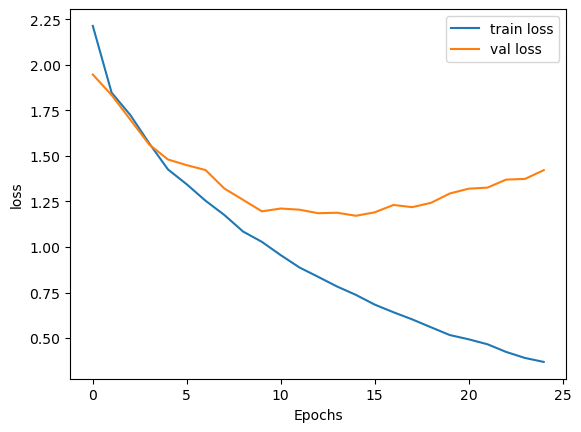

In [6]:
y_loss = model.history.history['loss']
y_vloss = model.history.history['val_loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, label='train loss')
plt.plot(x_len, y_vloss, label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')

plt.show()

In [7]:
test_docs = ['중부 지방은 대체로 맑으나 남부 지방은 구름이 많겠습니다.']
# test_docs = ['올 해부터 유동성의 힘으로 주가가 일정하게 상승하였습니다.']

In [8]:
token = Tokenizer()
token.fit_on_sequence(test_docs)
predict_ = token.texts_to_texts(test_docs)
model.predict(sequence.pad_sequences(predict_, maxlen=100))


AttributeError: 'Tokenizer' object has no attribute 'fit_on_sequence'

## LSTM 과 CNN 의 조합

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Dropout

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
print(x_train.shape, y_train.shape)

(25000,) (25000,)


In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)


model = Sequential()
model.add(Embedding(5000, 500))
model.add(Conv1D(64,4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(4))
model.add(LSTM(55))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 500)         2500000   
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          128064    
                                                                 
 dropout_3 (Dropout)         (None, None, 64)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping= EarlyStopping(monitor='val_loss', patience=10, verbose=0)

history = model.fit(x_train, y_train, epochs=100, batch_size=64,callbacks=[early_stopping], validation_split=.25)



Epoch 1/100
293/293 [==============================] - 116s 389ms/step - loss: 0.3919 - accuracy: 0.8127 - val_loss: 0.3087 - val_accuracy: 0.8725
Epoch 2/100
293/293 [==============================] - 112s 381ms/step - loss: 0.2206 - accuracy: 0.9154 - val_loss: 0.2749 - val_accuracy: 0.8914
Epoch 3/100
293/293 [==============================] - 111s 381ms/step - loss: 0.1559 - accuracy: 0.9438 - val_loss: 0.3135 - val_accuracy: 0.8819
Epoch 4/100
293/293 [==============================] - 113s 384ms/step - loss: 0.1120 - accuracy: 0.9613 - val_loss: 0.3311 - val_accuracy: 0.8774
Epoch 5/100
293/293 [==============================] - 111s 379ms/step - loss: 0.0810 - accuracy: 0.9732 - val_loss: 0.3959 - val_accuracy: 0.8766
Epoch 6/100
293/293 [==============================] - 111s 379ms/step - loss: 0.0533 - accuracy: 0.9819 - val_loss: 0.4690 - val_accuracy: 0.8795
Epoch 7/100
293/293 [==============================] - 111s 381ms/step - loss: 0.0482 - accuracy: 0.9837 - val_loss: 0

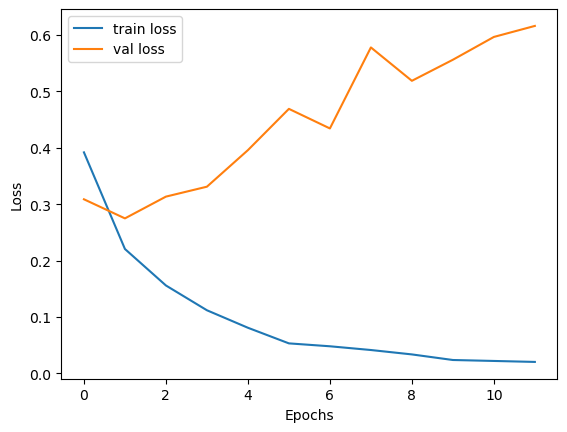

In [ ]:
y_loss = history.history['loss']
y_vloss = history.history['val_loss']
x_len= np.arange(len(y_loss))

plt.plot(x_len, y_loss, label='train loss')
plt.plot(x_len, y_vloss, label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

# val loss 가 적어야 손실 함수가 적음


### 딥 러닝 자연어 전처리
0. 필요한 문장만 남기고 불필요한 단어 제거(drop)
1. 문장을 단어마다 토큰화
2. 각 문장을 인덱스 배열로 변환
3. 각 문장을 같은 사이즈로 padding을 적용
4. 카테고리 원-핫 인코딩 성정(필요시 적용, sparse_categorical_crossentropy 사용시 불필요)
5. 모델에 적용(fit)

### 모델 생성
model = Sequential()
model.add 으로 필요한 은닉층을 만들고 처리할 레이어(layer)층 추가

Embedding       단어 임베딩
Conv1D          CNN 추가
LSTM            순서가 있는 또는 중요한 자료를 처리하기 위한 레이어(layer)

model.compile() 로 실핼 시킬 옵션 설정 (말 그대로 옵션임)

model.fit(x,y) 전처리 완료한 자료 데이터 훈련

model.evaluate(x,y) 학습 완료한 자료 데이터를 테스트 데이터로 정확도 확인 (훈력이 제대로 됐나 확인하는 단계)

model.predict(x) 완성된 모델을 실생활에 사용하는 데이터를 예측


In [9]:
# Attention() 사용


model = Sequential()
model.add(Embedding(5000, 500))
model.add(Conv1D(64,4, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(4))
model.add(LSTM(55,return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.add(Dropout(0.5))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 500)         2500000   
                                                                 
 conv1d (Conv1D)             (None, None, 64)          128064    
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, None, 55)          26400     
                                                                 
 attention (Attention)       (None, 128)               17105     
                                                      

In [ ]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping= EarlyStopping(monitor='val_loss', patience=10, verbose=0)

history = model.fit(x_train, y_train, epochs=100, batch_size=64,callbacks=[early_stopping], validation_split=.25)


Epoch 1/100
293/293 [==============================] - 123s 410ms/step - loss: 4.0873 - accuracy: 0.6157 - val_loss: 0.5807 - val_accuracy: 0.5552
Epoch 2/100
293/293 [==============================] - 117s 399ms/step - loss: 4.2385 - accuracy: 0.6225 - val_loss: 0.5783 - val_accuracy: 0.6058
Epoch 3/100
293/293 [==============================] - 116s 396ms/step - loss: 4.2976 - accuracy: 0.5900 - val_loss: 0.7930 - val_accuracy: 0.5061
Epoch 4/100
293/293 [==============================] - 116s 397ms/step - loss: 4.2953 - accuracy: 0.5467 - val_loss: 0.8861 - val_accuracy: 0.5061
Epoch 5/100
291/293 [============================>.] - ETA: 0s - loss: 4.2079 - accuracy: 0.5606